In [850]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## Choice of Prediction Model

Since we are predicting a Boolean outcome (whether the passenger survived or not), we use appropriate classification models such as decision trees.

In [852]:
# machine learning  不需要的我给注释掉了，最后要用就用，不用就删了
from sklearn.linear_model import LogisticRegression  # 属于线性模型，用于分类（逻辑回归）
# from sklearn.svm import SVC, LinearSVC               # 支持向量机，不属于线性回归或决策树
from sklearn.ensemble import RandomForestClassifier  # 随机森林，不是单一决策树
# from sklearn.neighbors import KNeighborsClassifier   # K近邻，不相关
# from sklearn.naive_bayes import GaussianNB           # 朴素贝叶斯，不相关
# from sklearn.linear_model import Perceptron          # 感知机，不是标准线性回归
# from sklearn.linear_model import SGDClassifier       # 随机梯度下降分类器，可用于线性模型但不特指线性回归
from sklearn.tree import DecisionTreeClassifier       # 决策树分类器，相关

In [853]:
train_df = pd.read_csv('train.csv')#文件路径可能会有不一样，我在这里为了省事把csv文件和这个ipynb放一个文件夹了
test_df = pd.read_csv('test.csv')#路径等最后所有都确认了再改

combine = [train_df, test_df]

## Overview of the Data 

In this step, we observe the general patterns of each data category as well as the total amount of data contained in each category. It is noticeable that some categories have fewer data entries compared to others, indicating that there are missing values. We will handle these missing values with appropriate methods later.

In [855]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [856]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [857]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [858]:
combine.describe()

AttributeError: 'list' object has no attribute 'describe'

## Preliminary Data Analysis

We begin by exploring the relationship between each feature category and the survival rate. This initial analysis helps us identify which features may be important predictors of survival and guides the direction for further data processing and model selection.

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='Blues_d')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # 生还率范围是 0 到 1
plt.show()

In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train_df, palette='Blues_d')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  
plt.show()

In [859]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/3679825843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=train_df, palette='Blues_d')


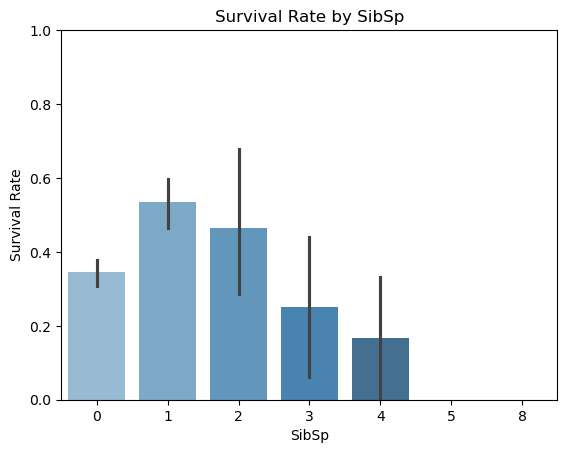

In [860]:
sns.barplot(x='SibSp', y='Survived', data=train_df, palette='Blues_d')
plt.title('Survival Rate by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) 
plt.show()

In [861]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/2179968618.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=train_df, palette='Blues_d')


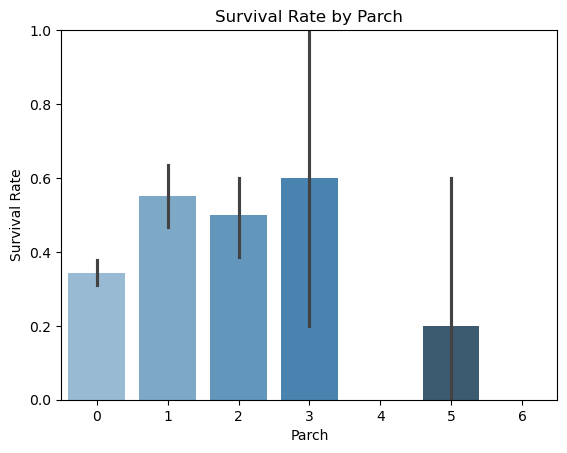

In [862]:
sns.barplot(x='Parch', y='Survived', data=train_df, palette='Blues_d')
plt.title('Survival Rate by Parch')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) 
plt.show()

In [863]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/1786391682.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=train_df, palette='Blues_d')


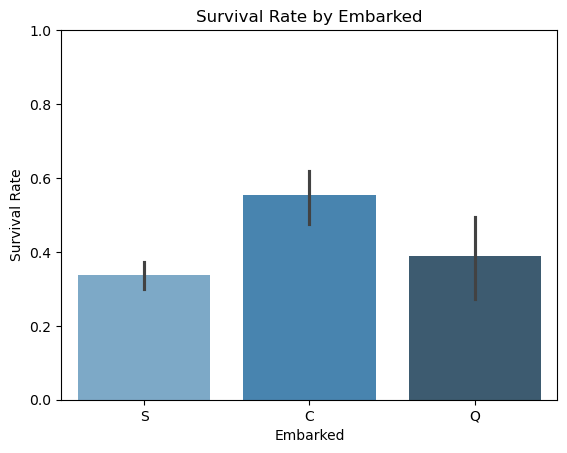

In [864]:
sns.barplot(x='Embarked', y='Survived', data=train_df, palette='Blues_d')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) 
plt.show()

In [865]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand')

/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/3627806787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand')


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/2737199602.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeBand', y='Survived', data=train_df, palette='Blues_d')


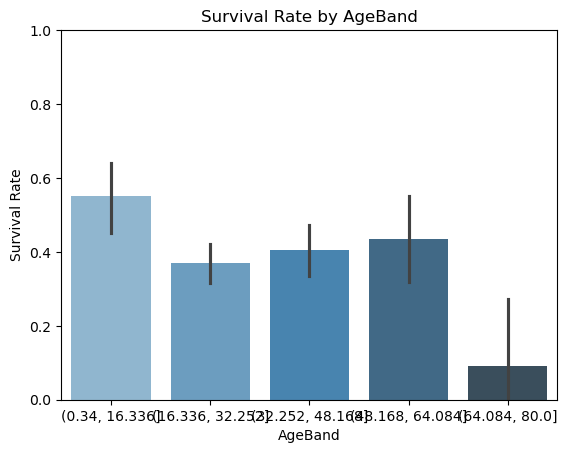

In [866]:
sns.barplot(x='AgeBand', y='Survived', data=train_df, palette='Blues_d')
plt.title('Survival Rate by AgeBand')
plt.xlabel('AgeBand')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) 
plt.show()

## Fare Distribution and Binning

The distribution of the Fare feature is highly skewed. If we divide the data based on equal price intervals, some categories will have very few samples. Therefore, we choose to divide the Fare feature based on quantiles to ensure that each bin contains a similar number of samples.

In [868]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 5)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/3925562446.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


## Filling in  missing information
Since the dataset contains missing age values, we use titles extracted from the names (such as Mr, Mrs, Miss, etc.) to help fill in the gaps. Titles often carry implicit information about a person's age and gender, making them useful for prediction. We convert these titles into meaningful age and gender features, and subsequently drop the original name column.

In [870]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/1184439594.py:3: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [871]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


We explore the relationship between Title and survival rate to determine whether Title is a predictive feature. For example, passengers with titles like Miss or Mrs tend to have higher survival rates, indicating that Title may be a useful feature for modeling and analysis.
We use .mean() because the Survived column is binary (0 or 1), so the mean directly represents the survival rate. In contrast, .median() would only show whether the majority survived or not, which is less informative. What we want to know is "what proportion of people in each title group survived," not just whether more lived or died.

In [873]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [874]:
title_ages = train_df.groupby('Title')['Age'].median()
for dataset in combine:
    dataset['Age'] = dataset.apply(
        lambda row: title_ages[row['Title']] if pd.isnull(row['Age']) else row['Age'],
        axis=1
    )

This code uses only the Title and Age information from the training set (train_df) to generate the filling values (title_ages).
It then applies this rule to all datasets in combine (typically including both train_df and test_df) to fill in missing Age values.
This approach helps prevent data leakage, as it ensures the model does not “peek” at the test set during the preprocessing stage.

In [876]:
dataset['Age'] = dataset['Age'].astype(int)
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/1655369411.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Survived', data=train_df, palette='Blues_d')


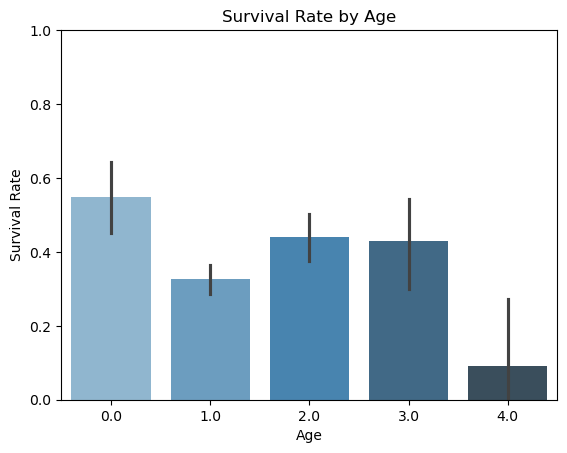

In [877]:
sns.barplot(x='Age', y='Survived', data=train_df, palette='Blues_d')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) 
plt.show()

In [878]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

We convert the Sex column from a categorical variable to a numerical one by replacing its values with integers: male is mapped to 0 and female to 1. This transformation allows us to use the feature in the later machine learning model

In [880]:
for dataset in combine:
    dataset.drop(['Title', 'Name', 'PassengerId'], axis=1, inplace=True)
train_df.drop(['AgeBand'], axis=1, inplace=True)

In [881]:

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.854]"
1,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,"(39.688, 512.329]"
2,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.854, 10.5]"
3,1,1,1,2.0,1,0,113803,53.1000,C123,S,"(39.688, 512.329]"
4,0,3,0,2.0,0,0,373450,8.0500,NaN,S,"(7.854, 10.5]"


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [883]:
all_embarked = pd.concat([df['Embarked'] for df in combine], ignore_index=True)
most_common_embarked = all_embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_common_embarked)
print(f"Embarked mode: {most_common_embarked}")

Embarked mode: S


In [884]:
for dataset in combine:
    dataset['Deck'] = dataset['Cabin'].str[0]
    dataset['Deck'] = dataset['Deck'].fillna('U')
    deck_mapping = {'': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)

### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [886]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0})

In [887]:
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_map)


In [888]:
deck_mapping = {'': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
for dataset in combine:
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)

Reason for not using Ticket

In [890]:
all_tickets = pd.concat([df[['Ticket']] for df in combine])
ticket_counts = all_tickets['Ticket'].value_counts()

train_df['Ticket_Count'] = train_df['Ticket'].map(ticket_counts)
test_df['Ticket_Count'] = test_df['Ticket'].map(ticket_counts)

print(train_df.columns)  
print(test_df.columns)  

print(train_df[['Ticket_Count', 'Survived']].groupby('Ticket_Count').mean().sort_index())

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'FareBand', 'Deck', 'Ticket_Count'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Deck', 'Ticket_Count'],
      dtype='object')
              Survived
Ticket_Count          
1             0.270270
2             0.513812
3             0.653465
4             0.727273
5             0.333333
6             0.210526
7             0.208333
8             0.384615
11            0.000000


In [891]:
for dataset in combine:
    dataset['Ticket_Count'] = dataset.groupby('Ticket')['Ticket'].transform('count')

In [892]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']

In [893]:
for dataset in combine:
    print(dataset[['Ticket_Count', 'Family']].groupby('Ticket_Count').mean())

                Family
Ticket_Count          
1             0.217550
2             1.191489
3             1.365079
4             3.000000
5             3.100000
6             5.666667
7             5.333333
                Family
Ticket_Count          
1             0.451713
2             1.666667
3             2.222222
4             5.500000
5             2.400000


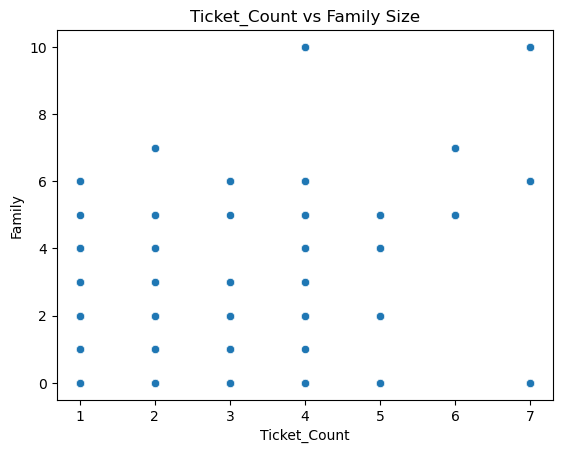

In [894]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=pd.concat(combine), x='Ticket_Count', y='Family')
plt.title('Ticket_Count vs Family Size')
plt.show()

have no obvious linear relationship

### Quick completing and converting a numeric feature

complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. 

round off the fare to two decimals

In [897]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/31889810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_Count,Family
0,3,NaN,2,0,0,330911,7.8292,NaN,2,NaN,1,0
1,3,NaN,2,1,0,363272,7.0000,NaN,0,NaN,1,1
2,2,NaN,3,0,0,240276,9.6875,NaN,2,NaN,1,0
3,3,NaN,1,0,0,315154,8.6625,NaN,0,NaN,1,0
4,3,NaN,1,1,1,3101298,12.2875,NaN,0,NaN,1,2


等频分箱

In [899]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/var/folders/4k/jgh8mjk12710qj_rn41375vw0000gn/T/ipykernel_98511/2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


手动分箱.将 Fare 特征转换为有序（ordinal）的数值。可以根据 Fare 的分箱（如将票价划分为不同区间）将 Fare 转换为有序数值，这样可以适应模型的需求。

In [901]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_Count,Family
0,0,3,NaN,1.0,1,0,A/5 21171,0,NaN,0,NaN,1,1
1,1,1,NaN,2.0,1,0,PC 17599,3,C85,1,NaN,1,1
2,1,3,NaN,1.0,0,0,STON/O2. 3101282,1,NaN,0,NaN,1,0
3,1,1,NaN,2.0,1,0,113803,3,C123,0,NaN,2,1
4,0,3,NaN,2.0,0,0,373450,1,NaN,0,NaN,1,0
5,0,3,NaN,1.0,0,0,330877,1,NaN,2,NaN,1,0
6,0,1,NaN,3.0,0,0,17463,3,E46,0,NaN,1,0
7,0,3,NaN,0.0,3,1,349909,2,NaN,0,NaN,4,4
8,1,3,NaN,1.0,0,2,347742,1,NaN,0,NaN,3,2
9,1,2,NaN,0.0,1,0,237736,2,NaN,1,NaN,2,1


In [902]:
test_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_Count,Family
0,3,NaN,2,0,0,330911,0,NaN,2,NaN,1,0
1,3,NaN,2,1,0,363272,0,NaN,0,NaN,1,1
2,2,NaN,3,0,0,240276,1,NaN,2,NaN,1,0
3,3,NaN,1,0,0,315154,1,NaN,0,NaN,1,0
4,3,NaN,1,1,1,3101298,1,NaN,0,NaN,1,2
5,3,NaN,0,0,0,7538,1,NaN,0,NaN,1,0
6,3,NaN,1,0,0,330972,0,NaN,2,NaN,1,0
7,2,NaN,1,1,1,248738,2,NaN,0,NaN,1,2
8,3,NaN,1,0,0,2657,0,NaN,1,NaN,1,0
9,3,NaN,1,2,0,A/4 48871,2,NaN,0,NaN,1,2
